In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [3]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

In [4]:
!nvcc --version

/bin/bash: nvcc: command not found


In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
!pip install albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album

In [8]:
!pip install -U git+https://github.com/qubvel/segmentation_models.pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-txtrrbzg
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-txtrrbzg
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 376 kB 23.3 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.0-py3-none-any.whl size=102076 sha256=8386a54832c58452c012bf13c7ee9d4d3fb212066d0f74f144c8c4f966296449
  Stored in directory: /tmp/pip-ephem-wheel-cache-jn2whzh4/wheels/fa/c5/a8/1e8af6cb04a0974db8a4a156ebd2fdd1d99ad2558d3fce49d4
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=00bd26868fd2f524c7d28

In [9]:
import segmentation_models_pytorch as smp

In [ ]:

DATA_DIR_tr = '/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/new_data_translated/train/'
x_train_dir = os.path.join(DATA_DIR_tr, 'image')
y_train_dir = os.path.join(DATA_DIR_tr, 'mask')

DATA_DIR_test = '/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/new_data_translated/test/'

x_valid_dir = os.path.join(DATA_DIR_test, 'image')
y_valid_dir = os.path.join(DATA_DIR_test, 'mask')

In [ ]:
#for file in os.listdir(x_train_dir):
  #print(file)

In [ ]:
class_dict = pd.read_csv("/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/label_class_dict.csv")
# Get class names
class_names = class_dict['name'].tolist()
# Get class RGB values
class_rgb_values = class_dict[['r','g','b']].values.tolist()

print('All dataset classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

All dataset classes and their corresponding RGB values in labels:
Class Names:  ['background', 'water', 'car']
Class RGB values:  [[0, 0, 0], [1, 1, 1], [2, 2, 2]]


In [ ]:
# Useful to shortlist specific classes in datasets with large number of classes
select_classes = ['background', 'water', 'car']

# Get RGB values of required classes
select_class_indices = [class_names.index(cls.lower()) for cls in select_classes]
select_class_rgb_values =  np.array(class_rgb_values)[select_class_indices]

print('Selected classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

Selected classes and their corresponding RGB values in labels:
Class Names:  ['background', 'water', 'car']
Class RGB values:  [[0, 0, 0], [1, 1, 1], [2, 2, 2]]


In [ ]:
# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map
    
# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x


# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [ ]:
class BuildingsDataset(torch.utils.data.Dataset):

    """Massachusetts Buildings Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_rgb_values (list): RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            class_rgb_values=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        
        self.image_paths = [os.path.join(images_dir, image_id) for image_id in sorted(os.listdir(images_dir))]
        self.mask_paths = [os.path.join(masks_dir, image_id) for image_id in sorted(os.listdir(masks_dir))]

        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)
        
        # one-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        # return length of 
        return len(self.image_paths)

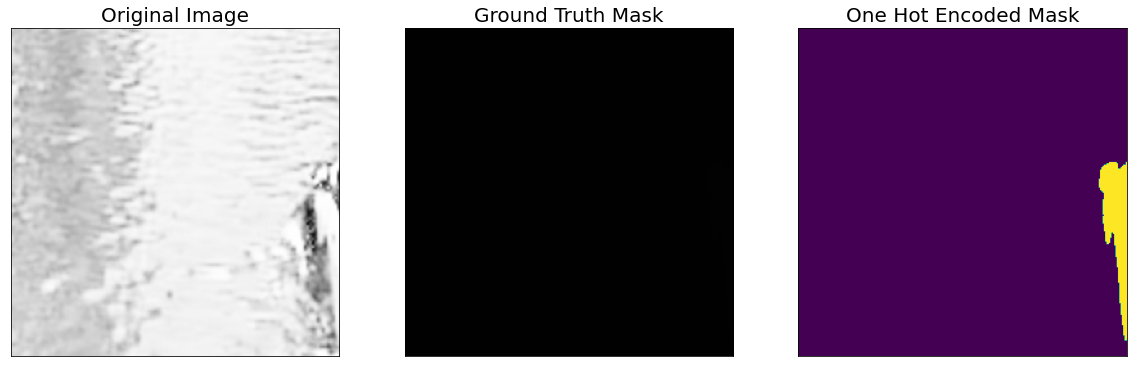

In [ ]:
dataset = BuildingsDataset(x_train_dir, y_train_dir, class_rgb_values=select_class_rgb_values)
random_idx = random.randint(0, len(dataset)-1)
image, mask = dataset[2]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [ ]:
def get_training_augmentation():
    train_transform = [    
        album.RandomCrop(height=256, width=256, always_apply=True),
        album.OneOf(
            [
                album.HorizontalFlip(p=1),
                #album.VerticalFlip(p=1),
                #album.RandomRotate90(p=1),
            ],
            p=0.75,
        ),
    ]
    return album.Compose(train_transform)


def get_validation_augmentation():   
    # Add sufficient padding to ensure image is divisible by 32
    test_transform = [
        album.PadIfNeeded(min_height=256, min_width=256, always_apply=True, border_mode=0),
    ]
    return album.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn=None):
    """Construct preprocessing transform    
    Args:
        preprocessing_fn (callable): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    """   
    _transform = []
    if preprocessing_fn:
        _transform.append(album.Lambda(image=preprocessing_fn))
    _transform.append(album.Lambda(image=to_tensor, mask=to_tensor))
        
    return album.Compose(_transform)

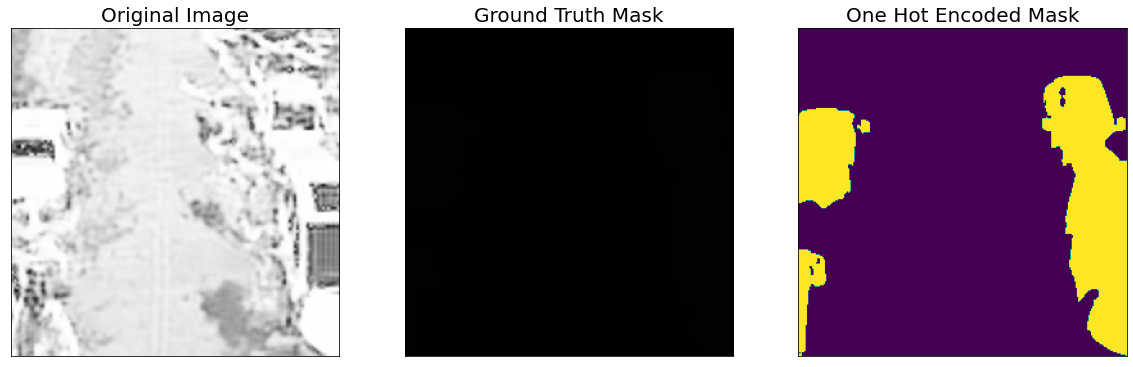

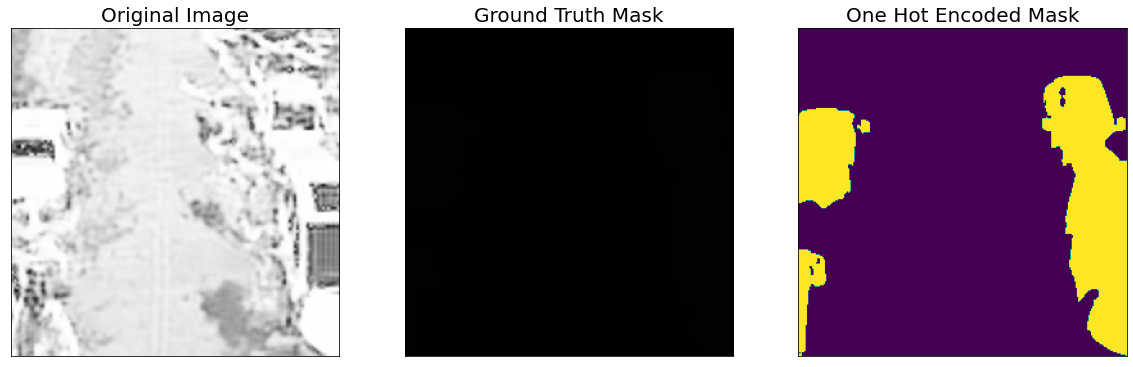

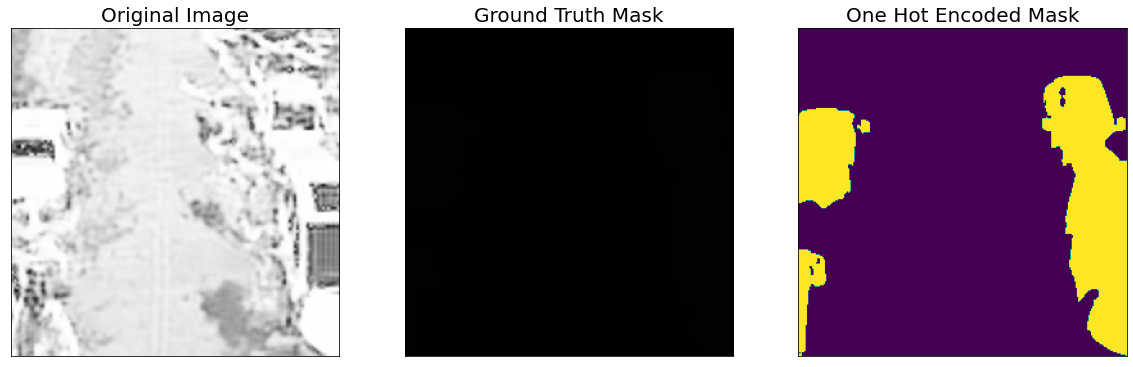

In [ ]:
augmented_dataset = BuildingsDataset(
    x_train_dir, y_train_dir, 
    augmentation=get_training_augmentation(),
    class_rgb_values=select_class_rgb_values,
)

random_idx = random.randint(0, len(augmented_dataset)-1)

# Different augmentations on a random image/mask pair (256*256 crop)
for i in range(3):
    image, mask = augmented_dataset[random_idx]
    visualize(
        original_image = image,
        ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
        one_hot_encoded_mask = reverse_one_hot(mask)
    )

In [ ]:
from torchsummary import summary
ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = class_names
ACTIVATION = 'softmax' # could be None for logits or 'softmax2d' for multiclass segmentation
#decoder_attention_type='scse'

# create segmentation model with pretrained encoder
model = smp.PSPNet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION
    
)
#summary(model,(3, 256, 256))

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# Get train and val dataset instances
train_dataset = BuildingsDataset(
    x_train_dir, y_train_dir, 
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

valid_dataset = BuildingsDataset(
    x_valid_dir, y_valid_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

# Get train and val data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=5)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=2)

In [ ]:
from segmentation_models_pytorch import utils

In [ ]:
# Set flag to train the model or not. If set to 'False', only prediction is performed (using an older model checkpoint)
TRAINING = True

# Set num of epochs
EPOCHS = 100

# Set device: `cuda` or `cpu`
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# define loss function
loss = smp.utils.losses.DiceLoss()

# define metrics

metrics = [
    smp.utils.metrics.Recall(threshold=0.5),
   smp.utils.metrics.Fscore(threshold=0.5),
    smp.utils.metrics.Accuracy(threshold=0.5),
   smp.utils.metrics.Precision(threshold=0.5),


]

# define optimizer
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

# define learning rate scheduler (not used in this NB)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=1, T_mult=2, eta_min=5e-5,
)

## load best saved model checkpoint from previous commit (if present)
#if os.path.exists('../input/deeplabv3-efficientnetb4-frontend-using-pytorch/best_model_resnot50_encoder.pth'):
    #model = torch.load('../input/deeplabv3-efficientnetb4-frontend-using-pytorch/best_model_resnot50_encoder.pth', map_location=DEVICE)

In [ ]:


train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)



In [ ]:
%%time

if TRAINING:

    best_iou_score = 0.0
    best_accuracy=0.0
    train_logs_list, valid_logs_list = [], []

    for i in range(0, EPOCHS):

        # Perform training & validation
        print('\nEpoch: {}'.format(i))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)
        train_logs_list.append(train_logs)
        valid_logs_list.append(valid_logs)

        # Save model if a better val IoU score is obtained
        if best_accuracy < valid_logs['accuracy']:
            best_accuracy = valid_logs['accuracy']
            torch.save(model, '/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/best_model_resnot50_encoder_PSPNet.pth')
            print('Model saved!')


Epoch: 0
valid: 100%|██████████| 1756/1756 [07:18<00:00,  4.01it/s, dice_loss - 0.04144, recall - 0.9595, fscore - 0.9595, accuracy - 0.973, precision - 0.9596]
Model saved!

Epoch: 1
valid: 100%|██████████| 1756/1756 [00:35<00:00, 49.68it/s, dice_loss - 0.01863, recall - 0.9829, fscore - 0.983, accuracy - 0.9887, precision - 0.9831]
Model saved!

Epoch: 2
valid: 100%|██████████| 1756/1756 [00:35<00:00, 49.49it/s, dice_loss - 0.01565, recall - 0.9854, fscore - 0.9854, accuracy - 0.9903, precision - 0.9855]
Model saved!

Epoch: 3
valid: 100%|██████████| 1756/1756 [00:35<00:00, 49.33it/s, dice_loss - 0.02455, recall - 0.9779, fscore - 0.9779, accuracy - 0.9853, precision - 0.978]

Epoch: 4
valid: 100%|██████████| 1756/1756 [00:35<00:00, 49.42it/s, dice_loss - 0.01315, recall - 0.9875, fscore - 0.9875, accuracy - 0.9917, precision - 0.9875]
Model saved!

Epoch: 5
valid: 100%|██████████| 1756/1756 [00:35<00:00, 49.30it/s, dice_loss - 0.01224, recall - 0.9883, fscore - 0.9883, accuracy - 0

In [ ]:
DATA_DIR='/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/real_test_667/'
x_test_dir = os.path.join(DATA_DIR, 'image')
y_test_dir = os.path.join(DATA_DIR, 'mask')

In [ ]:
# load best saved model checkpoint from the current run
if os.path.exists('/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/best_model_resnot50_encoder_PSPNet.pth'):
    best_model = torch.load('/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/best_model_resnot50_encoder_PSPNet.pth', map_location=DEVICE)
    print('Loaded DeepLabV3+ model from this run.')

Loaded DeepLabV3+ model from this run.


In [ ]:
best_model.eval()

PSPNet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [ ]:
best_model.decoder.psp.blocks[3]
#k['x_0_0']

PSPBlock(
  (pool): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(6, 6))
    (1): Conv2dReLU(
      (0): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
)

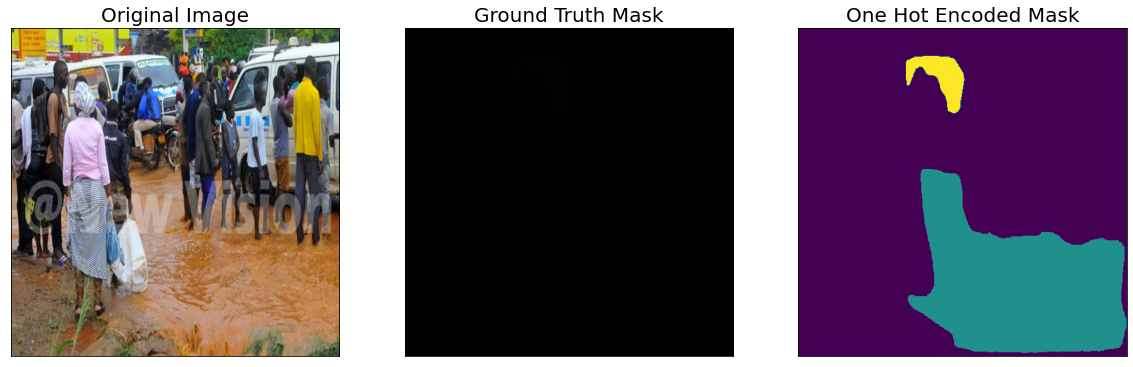

In [ ]:
# create test dataloader (with preprocessing operation: to_tensor(...))
test_dataset = BuildingsDataset(
    x_test_dir, 
    y_test_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

test_dataloader = DataLoader(test_dataset)

# test dataset for visualization (without preprocessing transformations)
test_dataset_vis = BuildingsDataset(
    x_test_dir, y_test_dir, 
    augmentation=get_validation_augmentation(),
    class_rgb_values=select_class_rgb_values,
)

# get a random test image/mask index
random_idx = random.randint(0, len(test_dataset_vis)-1)
image, mask = test_dataset_vis[random_idx]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [ ]:
test_epoch = smp.utils.train.ValidEpoch(
    best_model,
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

valid_logs = test_epoch.run(test_dataloader)
print("Evaluation on Test Data: ")
print(f"Mean Acc Score: {valid_logs['accuracy']:.4f}")
print(f"Mean dice_loss : {valid_logs['dice_loss']:.4f}")

valid: 100%|██████████| 667/667 [04:30<00:00,  2.47it/s, dice_loss - 0.3934, recall - 0.6068, fscore - 0.6069, accuracy - 0.738, precision - 0.607]
Evaluation on Test Data: 
Mean Acc Score: 0.7380
Mean dice_loss : 0.3934


##Results of 667 cases:

valid: 100%|██████████| 667/667 [02:45<00:00,  4.03it/s, dice_loss - 0.3934, recall - 0.6068, fscore - 0.6069, accuracy - 0.738, precision - 0.607]
Evaluation on Test Data: 
Mean Acc Score: 0.7380
Mean dice_loss : 0.3934

##Result for Deep Flood Dataset
valid: 100%|██████████| 446/446 [01:39<00:00,  4.47it/s, dice_loss - 0.3973, recall - 0.6029, fscore - 0.603, accuracy - 0.7354, precision - 0.6031]
Evaluation on Test Data: 
Mean Acc Score: 0.7354
Mean dice_loss : 0.3973

##Result for Sazara Dataset
valid: 100%|██████████| 446/446 [00:35<00:00, 12.68it/s, dice_loss - 0.3973, recall - 0.6029, fscore - 0.603, accuracy - 0.7354, precision - 0.6031]
Evaluation on Test Data: 
Mean Acc Score: 0.7354
Mean dice_loss : 0.3973

##Result for wsoc dataset
valid: 100%|██████████| 64/64 [00:28<00:00,  2.25it/s, dice_loss - 0.4089, recall - 0.5911, fscore - 0.5913, accuracy - 0.7276, precision - 0.5915]
Evaluation on Test Data: 
Mean Acc Score: 0.7276
Mean dice_loss : 0.4089


In [ ]:


# Center crop padded image / mask to original image dims
def crop_image(image, target_image_dims=[512,512,3]):
   
    target_size = target_image_dims[0]
    image_size = len(image)
    padding = (image_size - target_size) // 2

    return image[
        padding:image_size - padding,
        padding:image_size - padding,
        :,
    ]


In [ ]:
sample_preds_gt = '/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/sample_predictions_gt_mask_667_PSPNet/'
if not os.path.exists(sample_preds_gt):
    os.makedirs(sample_preds_gt)


sample_preds_pred= '/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/sample_predictions_pred_mask_667_PSPNet/'
if not os.path.exists(sample_preds_pred):
    os.makedirs(sample_preds_pred)

In [ ]:
for idx in range(len(test_dataset)):

    image, gt_mask = test_dataset[idx]
    image_vis = crop_image(test_dataset_vis[idx][0].astype('uint8'))
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    # Predict test image
    pred_mask = best_model(x_tensor)
    pred_mask = pred_mask.detach().squeeze().cpu().numpy()
    # Convert pred_mask from `CHW` format to `HWC` format
    pred_mask = np.transpose(pred_mask,(1,2,0))
    # Get prediction channel corresponding to building
    pred_car_heatmap = pred_mask[:,:,select_classes.index('car')]
    pred_mask = crop_image(colour_code_segmentation(reverse_one_hot(pred_mask), select_class_rgb_values))
    # Convert gt_mask from `CHW` format to `HWC` format
    gt_mask = np.transpose(gt_mask,(1,2,0))
    gt_mask = crop_image(colour_code_segmentation(reverse_one_hot(gt_mask), select_class_rgb_values))
    cv2.imwrite(os.path.join(sample_preds_gt, f"sample_gt_{idx}.png"), gt_mask[:,:,::-1])
    cv2.imwrite(os.path.join(sample_preds_pred, f"sample_pred_{idx}.png"),pred_mask[:,:,::-1])

In [10]:
def get_background(data):
    return data==0

def get_water(data):
    return data==1

def get_car(data):
    return data==2
def get_dice_score(prediction, ground_truth):
    # print (np.unique(prediction), np.unique(ground_truth))
    masks=(get_background, get_water, get_car)
    p    =np.uint8(prediction)
    gt   =np.uint8(ground_truth)
    bg,wt,car=[2*np.sum(func(p)*func(gt)) / (np.sum(func(p)) + np.sum(func(gt))+1e-6) for func in masks]
    return bg, wt, car 

def get_dice_loss(prediction, ground_truth):
    # print (np.unique(prediction), np.unique(ground_truth))
    masks=(get_background, get_water, get_car)
    p    =np.uint8(prediction)
    gt   =np.uint8(ground_truth)
    bg,wt,car=[1-(2*np.sum(func(p)*func(gt)) / (np.sum(func(p)) + np.sum(func(gt))+1e-6)) for func in masks]
    return bg, wt, car 

In [11]:
image_list=[]
dice_score_list=[]
dice_loss_list=[]
pred='/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/sample_predictions_pred_mask_667_PSPNet'
gt='/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/sample_predictions_gt_mask_667_PSPNet'

for file in os.listdir(pred):
  name1=file.split('.')[0]
  pred_file=name1.split('_')[2]
  #print(pred_file)
 
  for img in os.listdir(gt):
    name2=img.split('.')[0]
    gt_file=name2.split('_')[2]

    if pred_file==gt_file:
     image_list.append(file)

     pred_img=cv2.imread(os.path.join(pred,file))
     gt_img=cv2.imread(os.path.join(gt,img))

     dice_score = list(get_dice_score(pred_img, gt_img))
     dice_loss  = list(get_dice_loss(pred_img, gt_img))
     dice_score_list.append(dice_score)
     dice_loss_list.append(dice_loss)


In [12]:
background_dice_score=[]
background_dice_loss=[]
for i in range(len(dice_score_list)):
  score=dice_score_list[i][2]
  loss = dice_loss_list[i][2]
  background_dice_score.append(score)
  background_dice_loss.append(loss)

In [13]:
water_dice_score=[]
water_dice_loss=[]
for i in range(len(dice_score_list)):
  score=dice_score_list[i][1]
  loss=dice_loss_list[i][1]
  water_dice_score.append(score)
  water_dice_loss.append(loss)

In [14]:
car_dice_score=[]
car_dice_loss=[]
for i in range(len(dice_score_list)):
  score=dice_score_list[i][0]
  loss=dice_loss_list[i][0]
  car_dice_score.append(score)
  car_dice_loss.append(loss)

In [15]:
dataframe=pd.DataFrame()
dataframe['Image']=image_list
dataframe['Background_dice']=background_dice_score
dataframe['Water_dice']=water_dice_score
dataframe['Car dice']=car_dice_score
dataframe['Background_dice_loss']=background_dice_loss
dataframe['water_dice_loss']=water_dice_loss
dataframe['car_dice_loss']=car_dice_loss

In [16]:
dataframe.to_csv('/content/gdrive/MyDrive/Flood_Project/Synthetic_Flood_Images_Blender/translated_image_mask_1466/results/dice_score_667_model_PSPNet.csv')